# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [225]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [291]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [261]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [262]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [263]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

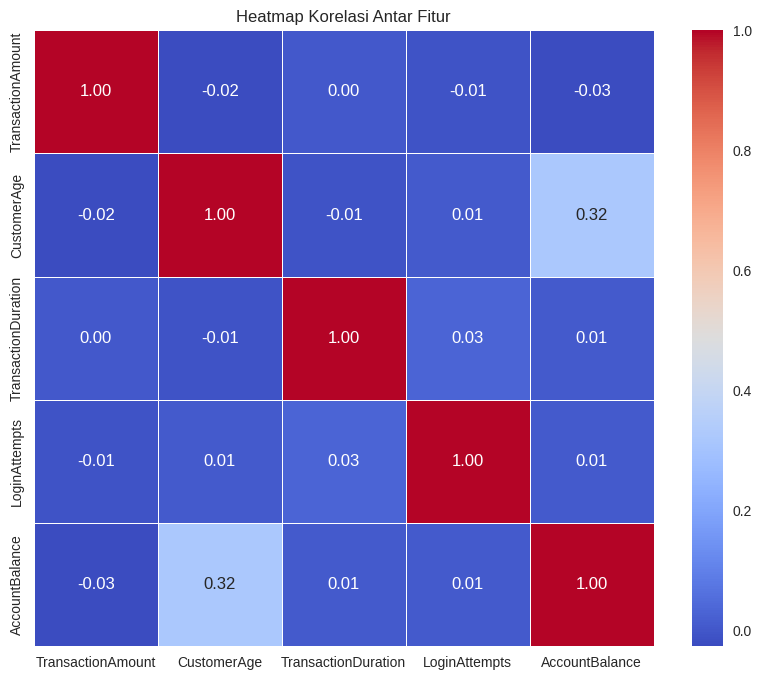

In [264]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numerical_cols = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()


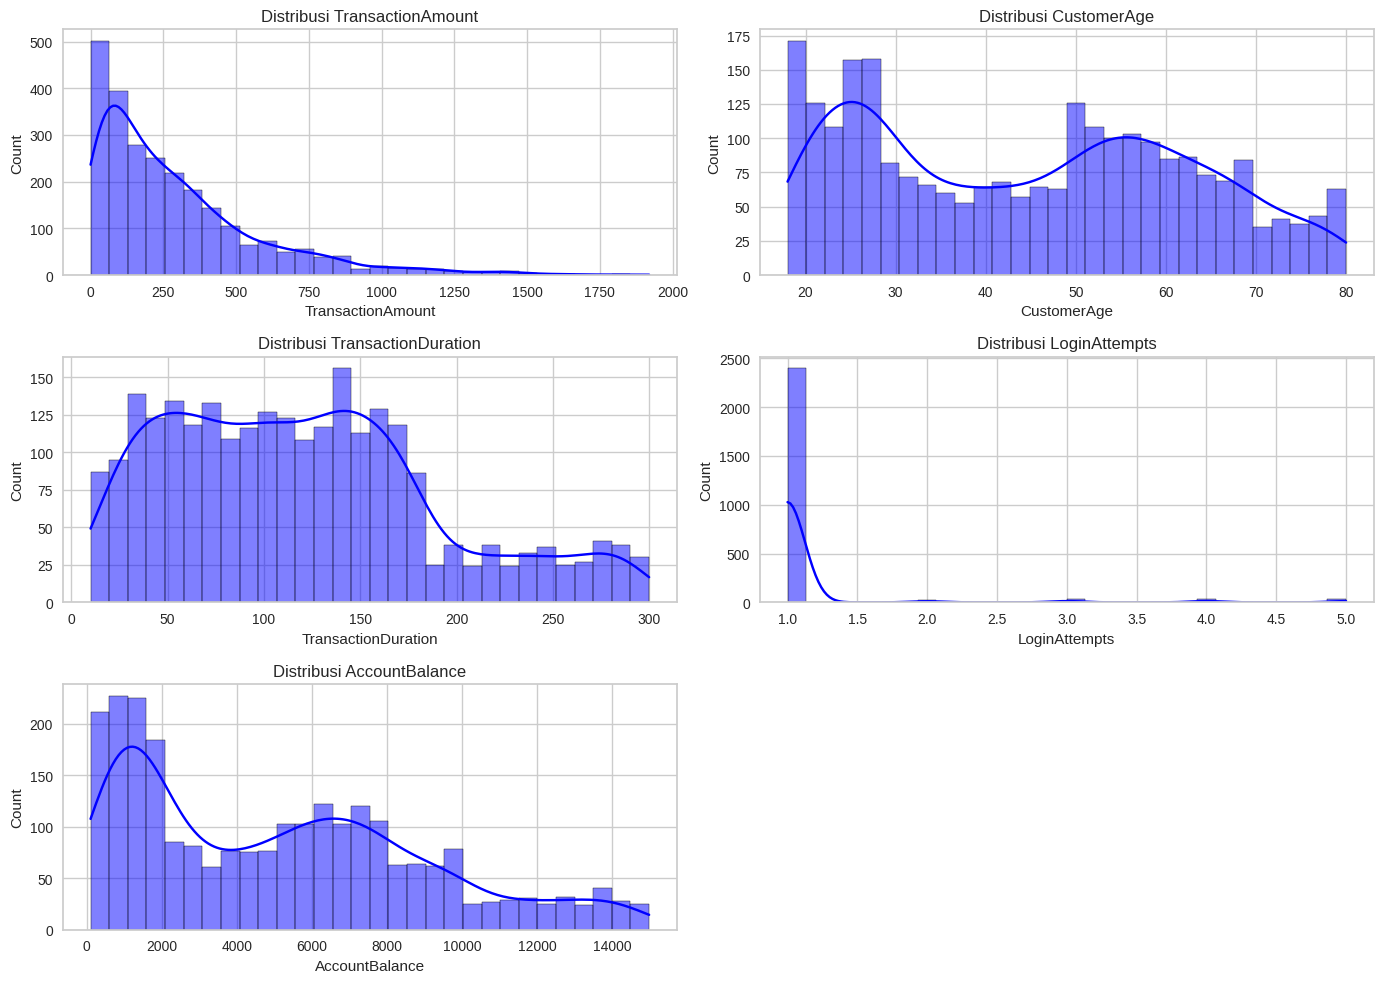

In [265]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_cols.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

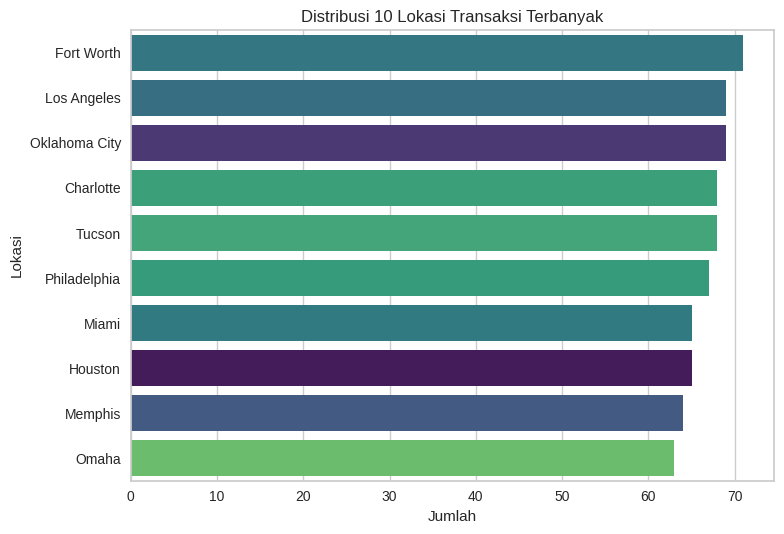

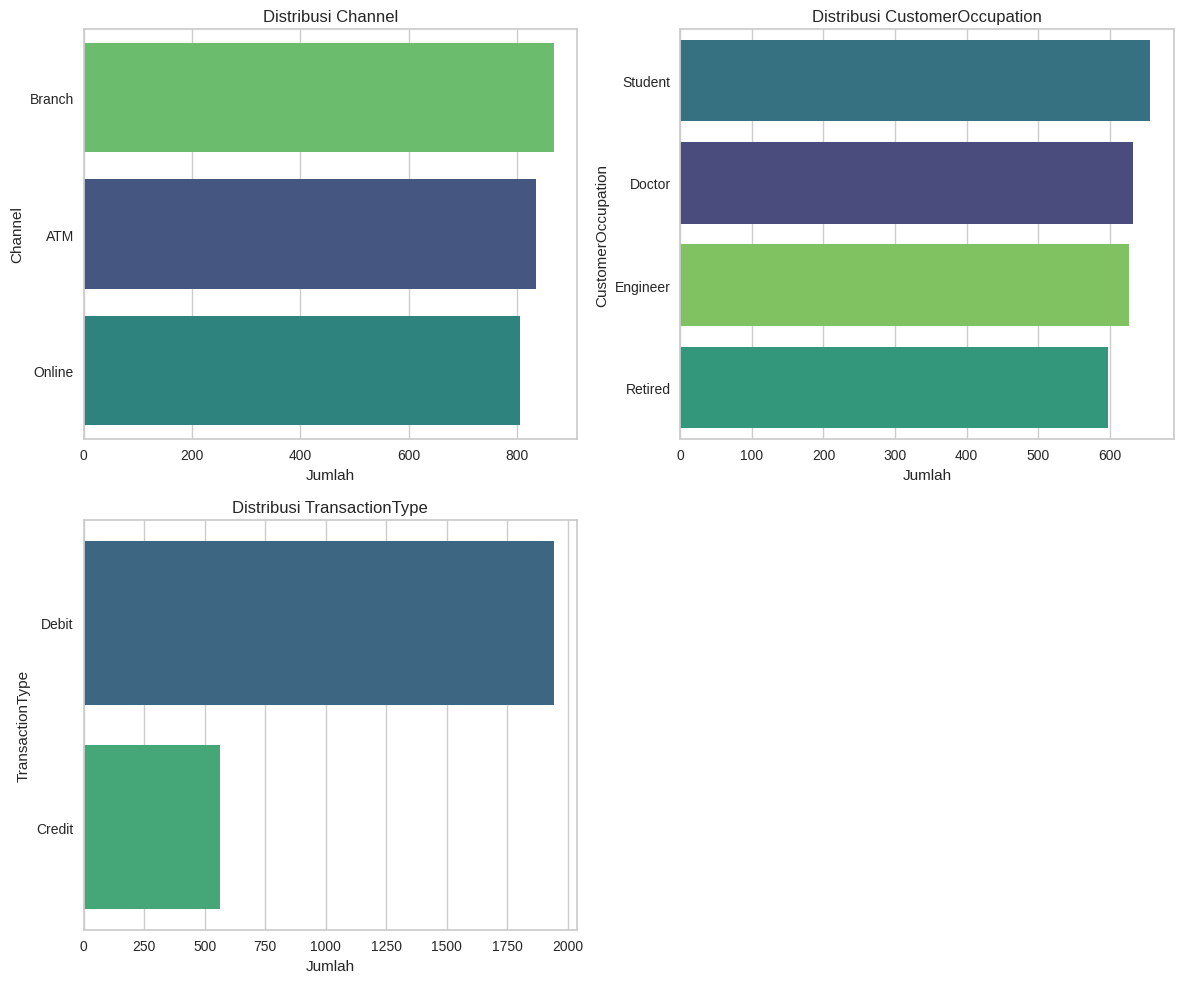

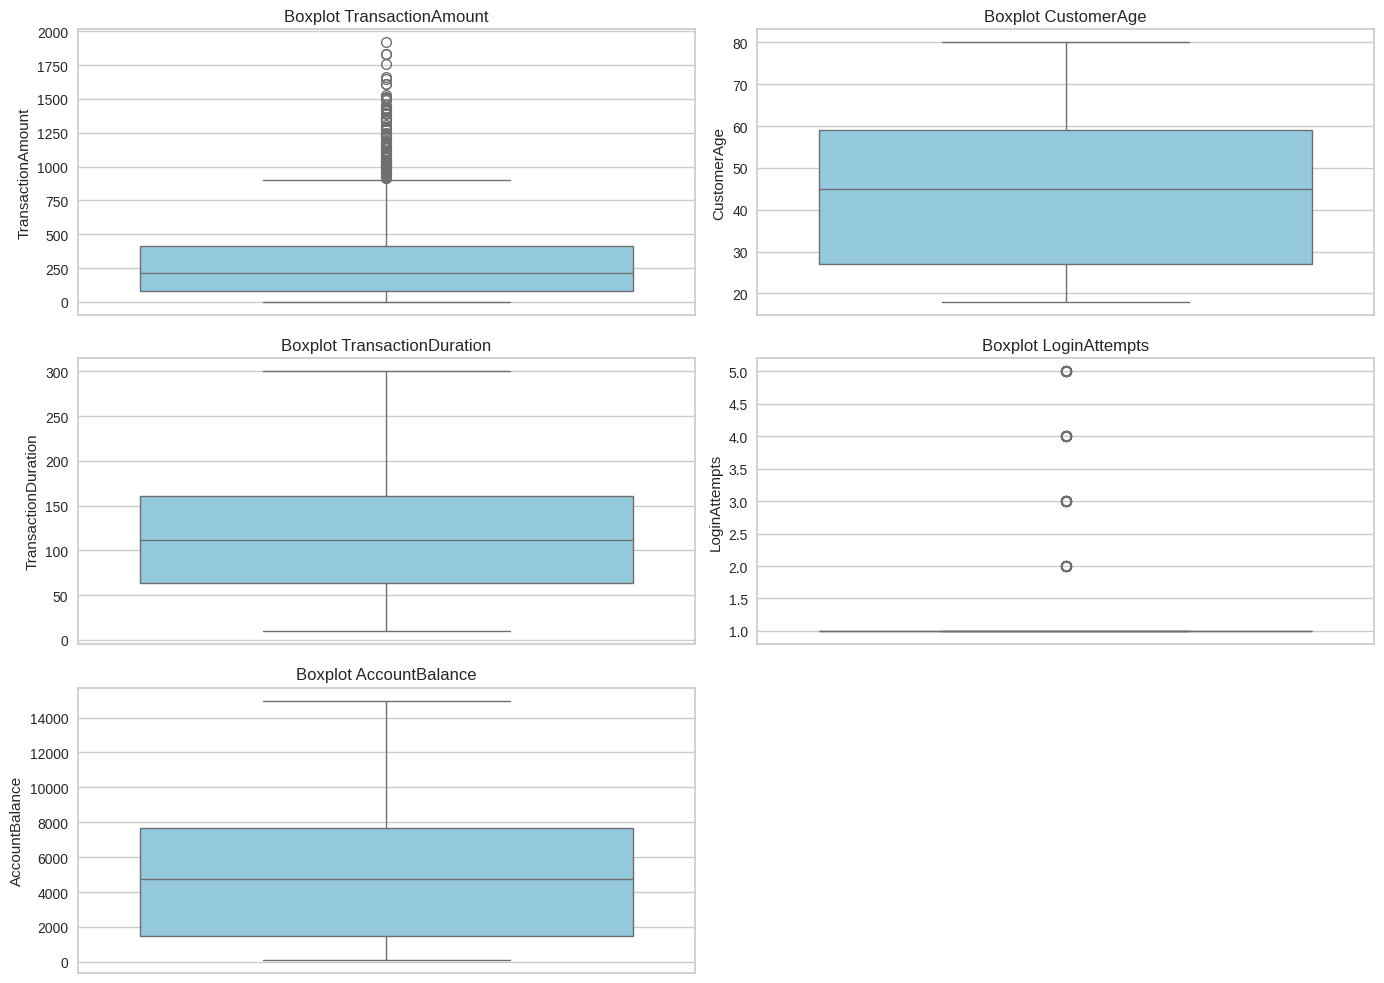

In [266]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
top10_locations = df['Location'].value_counts().nlargest(10).index
sns.countplot(
    y=df['Location'],
    order=top10_locations,
    hue=df['Location'],
    palette="viridis",
    legend=False
)
plt.title("Distribusi 10 Lokasi Transaksi Terbanyak")
plt.xlabel("Jumlah")
plt.ylabel("Lokasi")
plt.tight_layout()
plt.show()

cat_features = [ 'Channel', 'CustomerOccupation','TransactionType']
plt.figure(figsize=(12, 10))
for i, column in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    order = df[column].value_counts().index
    sns.countplot(y=df[column], order=order, hue=df[column], palette="viridis", legend=False)
    plt.title(f'Distribusi {column}')
    plt.xlabel("Jumlah")

plt.tight_layout()
plt.show()



plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_cols.columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [292]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [293]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [294]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_scaled = df.copy()
numerical_cols = ['TransactionAmount','CustomerAge','TransactionDuration','AccountBalance','LoginAttempts']
scaler = MinMaxScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df_scaled.head(5)


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [295]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address dan Date
df_scaled = df_scaled.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address','MerchantID','TransactionDate','PreviousTransactionDate'], axis=1)
df_scaled.head(5)


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832
1,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055
2,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637
3,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198
4,0.006874,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591


In [296]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
df_encoded = df_scaled.copy()
encoders = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    df_encoded[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder
df_encoded.head(5)


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
4,0.006874,0,1,2,NaN,3,0.648276,0.0,0.492591


In [297]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df_encoded.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [298]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_encoded.dropna(inplace=True)
df_encoded.isna().sum()


,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [299]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_encoded.drop_duplicates(inplace=True)
df_encoded.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [300]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

# Pilih kolom numerik
numerical_cols = df.select_dtypes(include=['float64']).columns

# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers_iqr(df, cols):
    df_clean = df_encoded.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter data agar hanya yang dalam rentang
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

# Terapkan fungsi
df_no_outlier = remove_outliers_iqr(df_encoded, numerical_cols)

print(f"Sebelum: {len(df_encoded)} baris")
print(f"Sesudah: {len(df_no_outlier)} baris")
print(f"Jumlah data yang dihapus: {len(df_encoded) - len(df_no_outlier)}")



Sebelum: 2397 baris
Sesudah: 2182 baris
Jumlah data yang dihapus: 215


In [301]:
# # Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# # lakukan pada satu sampai dua fitur numerik.
# # Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# # Pastikan kamu mengerjakan tahapan ini pada satu cell.

df_bining = df_no_outlier.copy()

# Binning usia pelanggan ke kategori
bins = [17, 25, 40, 60, float('inf')]
labels = ["Remaja", "Dewasa Muda", "Dewasa", "Lansia"]

df_bining['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels)

# Encode hasil binning dengan LabelEncoder
encoder = LabelEncoder()
df_bining['AgeGroup'] = encoder.fit_transform(df_bining['AgeGroup'])
encoders['AgeGroup'] = encoder

# Binning TransactionAmount ke dalam kategori
bins = [0, 200, 800, float('inf')]
labels = ["Sedikit", "Sedang", "Banyak"]

df_bining['TransactionSize'] = pd.cut(df['TransactionAmount'], bins=bins, labels=labels)

# Encode kategori ke angka
encoder = LabelEncoder()
df_bining['TransactionSize'] = encoder.fit_transform(df_bining['TransactionSize'])
encoders['TransactionSize'] = encoder

# Cek hasil
df_prepo = df_bining.copy()
df_prepo.head()


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,TransactionSize
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832,2,2
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,2,1
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,3,2
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,1,2
5,0.047888,1,28,0,0.000000,3,0.558621,0.0,0.045738,3,2


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [302]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_prepo.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,TransactionSize
count,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.0,2182.000000,2182.000000,2182.000000
mean,0.133234,0.789184,21.464253,1.012374,0.429755,1.531164,0.375208,0.0,0.336191,1.263978,1.477544
std,0.113169,0.440408,12.444811,0.827836,0.286194,1.152192,0.241752,0.0,0.261031,1.110153,0.546088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.040608,1.000000,11.000000,0.000000,0.145161,0.000000,0.180172,0.0,0.094340,0.000000,1.000000
50%,0.103797,1.000000,22.000000,1.000000,0.435484,2.000000,0.346552,0.0,0.310840,1.000000,2.000000
75%,0.195837,1.000000,32.000000,2.000000,0.661290,3.000000,0.523276,0.0,0.506558,2.000000,2.000000
max,0.470558,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,3.000000,2.000000


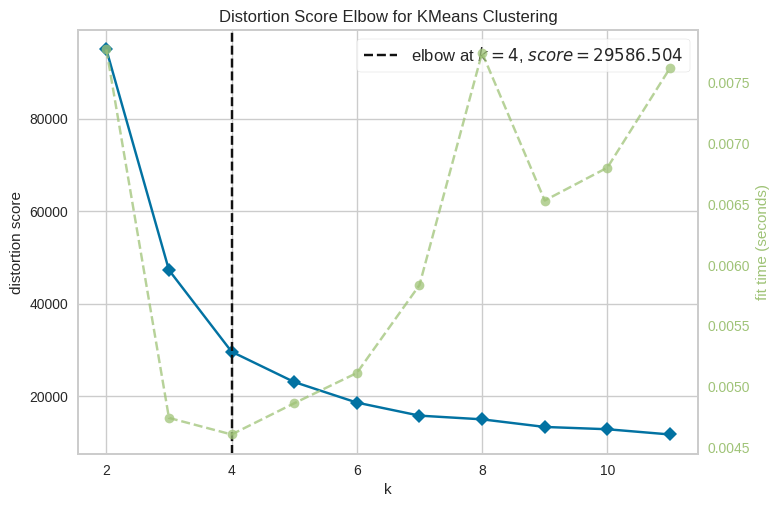

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [303]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(df_prepo)
visualizer.show()

In [304]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_prepo)

KMeans(n_clusters=4, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [305]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [306]:
# Menghitung dan menampilkan nilai Silhouette Score.
labels = kmeans.labels_
score = silhouette_score(df_prepo, labels)
print("Silhouette Score k=4:", score)

Silhouette Score k=4: 0.48386716059112367


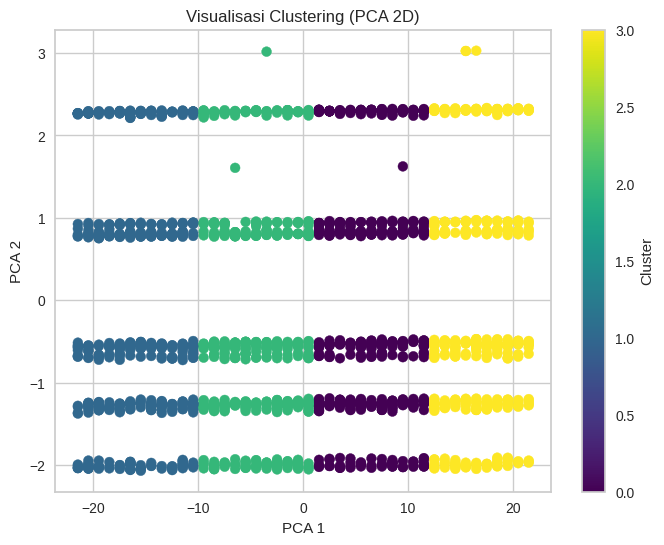

In [307]:
# Membuat visualisasi hasil clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_prepo)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Visualisasi Clustering (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [308]:
# Membangun model menggunakan PCA.
Pca =PCA(n_components=2)
X_pca = Pca.fit_transform(df_prepo)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
PCA_2 = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
Kmeans_Pca = KMeans(n_clusters=4)
Kmeans_Pca.fit(PCA_2)

labels = Kmeans_Pca.labels_
score = silhouette_score(X_pca, labels)
print("Silhouette Score PCA k=4:", score)

Silhouette Score PCA k=4: 0.5263113768030512


In [309]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(Kmeans_Pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [310]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
numerical_cols = ['TransactionAmount','CustomerAge','TransactionDuration','AccountBalance']
df_prepo['Cluster'] = labels
cluster_summary = df_prepo.groupby('Cluster')[numerical_cols].agg(['min', 'mean', 'max',])
cluster_summary


TransactionAmount                     CustomerAge                 \
                      min      mean       max         min      mean  max   
Cluster                                                                    
0                0.000599  0.132891  0.463168         0.0  0.405514  1.0   
1                0.000031  0.131263  0.467223         0.0  0.442840  1.0   
2                0.000000  0.131828  0.459046         0.0  0.442230  1.0   
3                0.000099  0.137278  0.470558         0.0  0.429249  1.0   

        TransactionDuration                     AccountBalance            \
                        min      mean       max            min      mean   
Cluster                                                                    
0                       0.0  0.365632  0.986207       0.000000  0.331774   
1                       0.0  0.380193  1.000000       0.001885  0.336255   
2                       0.0  0.367802  0.996552       0.000774  0.332924   
3                       0.0  0.389043  0.996552       0.001125  0.344765   

                   
              max  
Cluster            
0        1.000000  
1        0.997144  
2        0.979704  
3        0.997633

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Low Risk, Nasabah Muda Reguler)**:
  - **Minimum (min) TransactionAmount :** 0.0006 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) TransactionAmount :** 0.13 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) TransactionAmount :** 0.46 <Sebelum inverse> <Setelah inverse>

  - **Minimum (min) CustomerAge :**  0.00 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) CustomerAge :**  0.40 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) CustomerAge :**  1.0 <Sebelum inverse> <Setelah inverse>

  - **Minimum (min) TransactionDuration :**  0.0 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) TransactionDuration :**  0.37 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) TransactionDuration :**  0.99 <Sebelum inverse> <Setelah inverse>

  - **Minimum (min) AccountBalance :**  0.0 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) AccountBalance :**  0.33 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) AccountBalance :**  1.0 <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Nilai transaksi relatif rendah dan tidak terlalu bervariasi, menandakan aktivitas finansial yang stabil dan nominal transaksi kecil.Mayoritas berada pada usia muda hingga dewasa awal. Rentang luas menunjukkan keberagaman usia, tetapi dominannya tetap pada kelompok muda.Durasi transaksi cukup singkat hingga sedang, tanpa nilai ekstrem.Saldo bervariasi, tetapi rata-ratanya rendah; mayoritas nasabah dengan saldo kecil hingga menengah.Cluster ini menggambarkan nasabah muda dengan aktivitas finansial rutin dan nominal transaksi kecil. Rentang nilai yang relatif sempit antara min dan max menunjukkan stabilitas perilaku transaksi. Tidak ada indikasi anomali


2. **Cluster 1: (Medium - Hight )**:
  - **Minimum (min) TransactionAmount :** 0.00003 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) TransactionAmount :** 0.13 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) TransactionAmount :** 0.47 <Sebelum inverse> <Setelah inverse>


  - **Minimum (min) CustomerAge :**  0.0 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) CustomerAge :**  0.44 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) CustomerAge :**  1.0 <Sebelum inverse> <Setelah inverse>

  - **Minimum (min) TransactionDuration :**  0.0 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) TransactionDuration :**  0.38 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) TransactionDuration :**  1.0 <Sebelum inverse> <Setelah inverse>

   - **Minimum (min) AccountBalance :**  0.0029<Sebelum inverse> <Setelah inverse>  
  - **Rata-rata (mean) AccountBalance :**  0.34 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) AccountBalance :**  1.0 <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Nominal transaksi rata-rata mirip cluster lain, tapi rentangnya menunjukkan adanya nilai ekstrem pada beberapa nasabah.Sebaran usia cenderung lebih tinggi, dominan pada nasabah tua.Durasi transaksi cenderung lebih panjang, dengan nilai maksimum tinggi, indikasi aktivitas transaksi yang tidak efisien atau tidak wajar.Saldo rata-rata cukup tinggi dengan nilai maksimum penuh, menandakan potensi pergerakan dana besar.Cluster ini memperlihatkan nasabah usia tua dengan aktivitas transaksi beragam dan durasi panjang. Adanya nilai maksimum tinggi pada AccountBalance dan TransactionDuration bisa menandakan transaksi tidak lazim atau mencurigakan.

  3. **Cluster 2: (Low - Medium)**:
  - **Minimum (min) TransactionAmount :** 0.0 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) TransactionAmount :** 0.13 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) TransactionAmount :** 0.46 <Sebelum inverse> <Setelah inverse>

  - **Minimum (min) CustomerAge :**  0.0 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) CustomerAge :**  0.44 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) CustomerAge :**  1.0 <Sebelum inverse> <Setelah inverse>


  - **Minimum (min) TransactionDuration :**  0.0 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) TransactionDuration :**  0.37 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) TransactionDuration :**  1.0 <Sebelum inverse> <Setelah inverse>

  - **Minimum (min) AccountBalance :**  0.0087 <Sebelum inverse> <Setelah inverse>  
  - **Rata-rata (mean) AccountBalance :**  0.33 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) AccountBalance :**  0.98 <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Nilai transaksi rata-rata moderat, dengan rentang mirip cluster lain tetapi tanpa lonjakan ekstrem.Usia didominasi kelompok tua, sama seperti cluster 1, namun perilaku transaksi lebih konsisten.Durasi transaksi stabil tanpa nilai maksimum yang terlalu tinggi.Rentang saldo menunjukkan kondisi finansial stabil.Cluster ini menggambarkan nasabah usia tua dengan aktivitas finansial moderat dan konsisten. Tidak ditemukan nilai ekstrem pada min max, menunjukkan pola yang seimbang dan tidak berisiko tinggi


  4. **Cluster 3: (High Risk)**:
  - **Minimum (min) TransactionAmount :** 0.000011<Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) TransactionAmount :** 0.14 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) TransactionAmount :** 0.47 <Sebelum inverse> <Setelah inverse>

  - **Minimum (min) CustomerAge :**  0.0 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) CustomerAge :**  0.43 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) CustomerAge :**  0.10 <Sebelum inverse> <Setelah inverse>


  - **Minimum (min) TransactionDuration :**  0.0<Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) TransactionDuration :**  0.39 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) TransactionDuration :**  1.0 <Sebelum inverse> <Setelah inverse>

  - **Minimum (min) AccountBalance :**  0.0011 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) AccountBalance :**  0.34 <Sebelum inverse> <Setelah inverse>
  - **Maximum (max) AccountBalance :**  1.0 <Sebelum inverse> <Setelah inverse>

  - **Analisis:** Nilai transaksi rata-rata sedikit lebih tinggi dibanding cluster lain, menunjukkan aktivitas finansial aktif.Dominan pada kelompok usia dewasa produktif.Durasi transaksi lebih panjang dan bervariasi, menandakan intensitas transaksi tinggi.Rata-rata saldo tinggi dan rentang luas, menunjukkan pergerakan dana signifikan.Cluster ini menggambarkan nasabah dewasa dengan aktivitas finansial tinggi dan saldo besar. Hal ini mengindikasiakn aktivitas intensif, yang bisa berupa aktivitas bisnis atau indikasi risiko tinggi.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [311]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_prepo = df_prepo.rename(columns={'Cluster': 'Target'})

In [312]:
# Simpan Data
df_prepo.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [314]:
# inverse dataset ke rentang normal untuk numerikal
numerical_cols = ['TransactionAmount','CustomerAge','TransactionDuration','AccountBalance','LoginAttempts']
df_prepo[numerical_cols] = scaler.inverse_transform(df_prepo[numerical_cols])
# tampilkan dataset yang sudah di-inverse
df_prepo.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,TransactionSize,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,2,2,0
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,2,1,3
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,3,2,2
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,1,2,0
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68,3,2,2


In [315]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
df_inverse = df_prepo.copy()
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation','AgeGroup','TransactionSize']
for col in categorical_cols:
    encoder = encoders[col]
    df_inverse[col] = encoder.inverse_transform(df_prepo[col].astype(int))
# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,TransactionSize,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Lansia,Sedikit,0
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Lansia,Sedang,3
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Remaja,Sedikit,2
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Dewasa Muda,Sedikit,0
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Remaja,Sedikit,2


In [316]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
numerical_cols = ['TransactionDuration','AccountBalance','LoginAttempts']
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation','AgeGroup','TransactionSize']
cluster_summary_num = df_inverse.groupby('Target')[numerical_cols].agg(['min', 'mean', 'max'])
cluster_summary_cat = df_inverse.groupby('Target')[categorical_cols].agg(lambda x: x.mode()[0])
print(cluster_summary_num)
print("================================================================================================================")
print(cluster_summary_cat)

       TransactionDuration                    AccountBalance               \
                       min        mean    max            min         mean   
Target                                                                      
0                     10.0  116.033275  296.0         101.25  5036.958932   
1                     10.0  120.256075  300.0         129.29  5103.634243   
2                     10.0  116.662566  299.0         112.76  5054.070000   
3                     10.0  122.822485  299.0         117.98  5230.225345   

                 LoginAttempts            
             max           min mean  max  
Target                                    
0       14977.99           1.0  1.0  1.0  
1       14935.50           1.0  1.0  1.0  
2       14676.05           1.0  1.0  1.0  
3       14942.78           1.0  1.0  1.0  
       TransactionType       Location Channel CustomerOccupation AgeGroup  \
Target                                                                      
0    

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah Dewasa dengan Transaksi Kecil dan Stabil)**:
  - **Rata-rata (min) TransactionDuration:** 10
  - **Rata-rata (mean) TransactionDuration:** 116
  - **Rata-rata (max) TransactionDuration:** 296

  - **Rata-rata (min) AccountBalance:** 101
  - **Rata-rata (mean) AccountBalance:** 5037
  - **Rata-rata (max) AccountBalance:** 14978

  - **Location:** Tuscon
  - **CustomerOccupation:** Student
  - **TransactionSize:** Sedikit
  - **Analisis:** Durasi transaksi cenderung singkat hingga sedang, tanpa nilai ekstrem yang menonjol.aldo relatif kecil hingga menengah dengan variasi yang cukup besar, namun mayoritas masih pada kisaran rendah. Cluster ini mencerminkan nasabah dewasa dengan aktivitas transaksi rutin dan nominal kecil. Sebaran nilai AccountBalance menunjukkan stabilitas finansial dengan risiko rendah. Mayoritas nasabah masih dalam tahap awal produktif secara ekonomi, kemungkinan masih mahasiswa atau pekerja awal.

  2. **Cluster 1: (Nasabah Aktif, Medium Risk)**:
   - **Rata-rata (min) TransactionDuration:** 10
   - **Rata-rata (mean) TransactionDuration:** 120
   - **Rata-rata (max) TransactionDuration:** 300
  

   - **Rata-rata (min) AccountBalance:** 219
   - **Rata-rata (mean) AccountBalance:** 5104
   - **Rata-rata (max) AccountBalance:** 14936
  
   - **Location:** Charlotte
   - **CustomerOccupation:** Student
   - **TransactionSize:** Sedikit
   - **Analisis:** Rata-rata durasi transaksi sedikit lebih tinggi dari cluster 0, menunjukkan peningkatan aktivitas.Rata-rata saldo sedikit lebih besar, menandakan peningkatan kapasitas finansial.Cluster ini hampir serupa dengan cluster 0, namun dengan sedikit peningkatan pada saldo dan durasi transaksi. Artinya, nasabah mulai lebih aktif secara finansial, bisa jadi mulai bekerja atau memiliki sumber pendapatan tambahan. Aktivitasnya masih wajar dan terkontrol.

   3. **Cluster 2: ( Digitally Active, Low Risk)**:
   - **Rata-rata (min) TransactionDuration:** 10
   - **Rata-rata (mean) TransactionDuration:** 117
   - **Rata-rata (max) TransactionDuration:** 299
  
   - **Rata-rata (min) AccountBalance:** 113
   - **Rata-rata (mean) AccountBalance:** 5054
   - **Rata-rata (mean) AccountBalance:** 14676
  
   - **Location:** Oklahoma City
   - **CustomerOccupation:** Student
   - **TransactionSize:** Sedikit
   - **Analisis:** Durasi transaksi serupa dengan cluster 0, menunjukkan konsistensi perilaku.Saldo relatif stabil tanpa perbedaan mencolok dari cluster 0 dan 1. Karakteristik cluster ini nyaris identik dengan cluster 0, hanya berbeda dari sisi lokasi. Pola transaksi dan saldo menunjukkan perilaku finansial yang sehat, dengan risiko sangat rendah. Kemungkinan ini adalah variasi geografis dari nasabah reguler.

4. **Cluster 3: (Nasabah Potensial Fraud, High Risk)**:
   - **Rata-rata (min) TransactionDuration:** 10
   - **Rata-rata (mean) TransactionDuration:** 123
   - **Rata-rata (max) TransactionDuration:** 299
  
   - **Rata-rata (min) AccountBalance:** 118
   - **Rata-rata (mean) AccountBalance:** 5230
   - **Rata-rata (max) AccountBalance:** 14943
  
   - **Location:** Los Angeles
   - **CustomerOccupation:** Doctor
   - **TransactionSize:** Sedang
   - **Analisis:** Rata-rata durasi transaksi tertinggi di antara semua cluster, menunjukkan aktivitas intensif.Saldo lebih tinggi dari cluster lain, menandakan potensi transaksi bernilai besar.Cluster ini menggambarkan nasabah profesional dengan saldo besar dan aktivitas finansial tinggi. Durasi transaksi yang panjang serta saldo maksimum tinggi dapat menunjukkan aktivitas keuangan kompleks, bisa berupa investasi, bisnis, atau bahkan potensi fraud. Oleh karena itu, perlu pengawasan tambahan..

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [317]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse.head() # sudah dalam bentuk integrasi

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,TransactionSize,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Lansia,Sedikit,0
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Lansia,Sedang,3
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Remaja,Sedikit,2
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Dewasa Muda,Sedikit,0
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Remaja,Sedikit,2


In [319]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.